In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import ast
import numpy as np
from scipy.ndimage import gaussian_filter1d
import pandas as pd

<IPython.core.display.Javascript object>


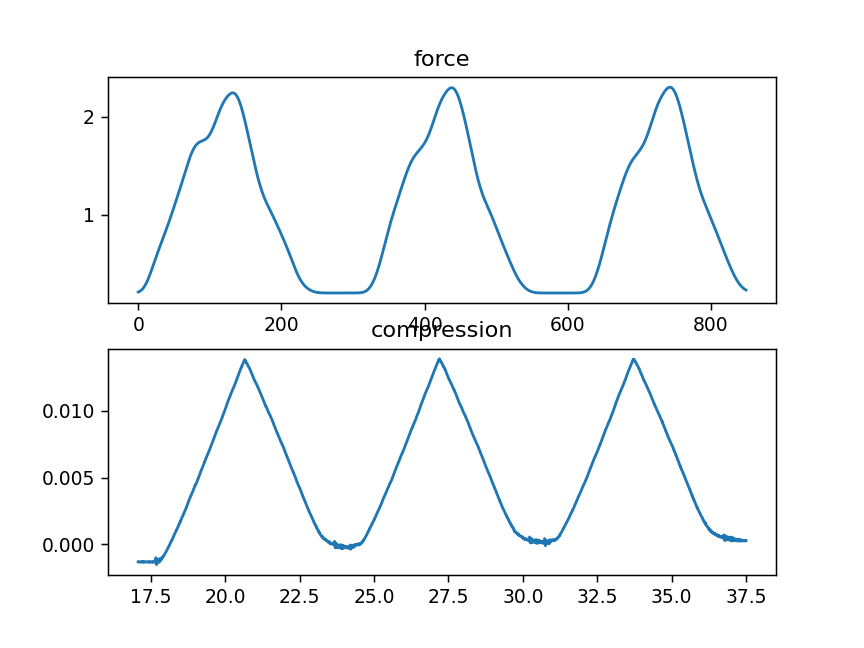

In [3]:
def get_seq_derivative(seq):
    der = []
    # camera frequency 120Hz
    dt = 1/120
    
    for i in range(1,len(seq)):
        der.append((seq[i]-seq[i-1])/dt)
    
    der.insert(0,der[0])
    
    return der

df = pd.read_csv('piano key stiffness cam.csv', skiprows = 6,usecols=[1,3,4])
# df['diff_ur_fin_filtered'] = gaussian_filter1d(df['diff_ur_fin'], sigma=2, truncate=4)


sigma = 8
truncate = 6
# diff = df.diff()
# diff['V_Y'] = gaussian_filter1d(diff['Y'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_Y.1'] = gaussian_filter1d(diff['Y.1'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_Y.2'] = gaussian_filter1d(diff['Y.2'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_ur_fin_relative'] = gaussian_filter1d(diff['diff_ur_fin_filtered'] / diff['Time'], sigma=sigma, truncate=truncate)

disp = gaussian_filter1d(df['Y'], sigma=sigma, truncate=truncate)
sigma = 8
truncate = 4
vel = gaussian_filter1d(get_seq_derivative(disp), sigma=sigma, truncate=truncate)
acc = get_seq_derivative(vel)

start = 58800
end = 59300
plt.subplot(3, 1, 1)
plt.plot(df['Time'][start:end], disp[start:end])
plt.subplot(3, 1, 2)
plt.plot(df['Time'][start:end], vel[start:end])
plt.subplot(3, 1, 3)
plt.plot(df['Time'][start:end], acc[start:end])
plt.show()


<IPython.core.display.Javascript object>


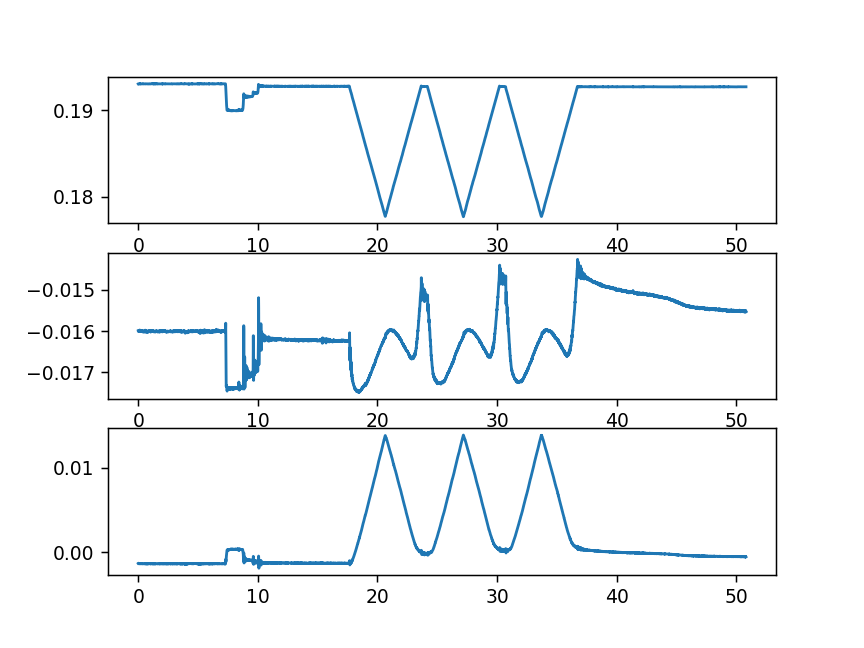

In [4]:
def get_seq_derivative(seq):
    der = []
    # camera frequency 120Hz
    dt = 1/120
    
    for i in range(1,len(seq)):
        der.append((seq[i]-seq[i-1])/dt)
    
    der.insert(0,der[0])
    
    return der


# df['diff_ur_fin_filtered'] = gaussian_filter1d(df['diff_ur_fin'], sigma=2, truncate=4)


# sigma = 8
# truncate = 6
# diff = df.diff()
# diff['V_Y'] = gaussian_filter1d(diff['Y'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_Y.1'] = gaussian_filter1d(diff['Y.1'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_Y.2'] = gaussian_filter1d(diff['Y.2'] / diff['Time'], sigma=sigma, truncate=truncate)
# diff['V_ur_fin_relative'] = gaussian_filter1d(diff['diff_ur_fin_filtered'] / diff['Time'], sigma=sigma, truncate=truncate)

# disp = gaussian_filter1d(df['Y'], sigma=sigma, truncate=truncate)
# sigma = 8
# truncate = 4
# vel = gaussian_filter1d(get_seq_derivative(disp), sigma=sigma, truncate=truncate)

df = pd.read_csv('NP80 cam.csv', skiprows = 6,usecols=[1,3,6])
df['diff_ur_fin'] = 0.2077*np.ones(len(df['Y']))-(df['Y']-df['Y.1'])
start = 0
end = 6100
plt.figure(0)
plt.subplot(3, 1, 1)
plt.plot(df['Time'][start:end], df['Y'][start:end])
plt.subplot(3, 1, 2)
plt.plot(df['Time'][start:end], df['Y.1'][start:end])
plt.subplot(3, 1, 3)
plt.plot(df['Time'][start:end], df['diff_ur_fin'][start:end])
plt.show()


In [5]:
pressure = 80
force_list = []
with open('Soft finger stiffness measureing/NP'+str(pressure)+'.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        reading = [int(s) for s in line.split() if s.isdigit()]
        force = 0.0353*reading[0] + 0.204
        force_list.append(float(force))

sigma = 8
truncate = 4
force_list = gaussian_filter1d(force_list, sigma=sigma, truncate=truncate)
start = 1050
end = 1900
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(force_list[start:end])
plt.title('force')

start = 2050
end = 4500
plt.subplot(2, 1, 2)
plt.plot(df['Time'][start:end], df['diff_ur_fin'][start:end])
plt.title('compression')
plt.show()


In [29]:
pressure_list = [0,10,20,30,40,50,60,70,80]
pressure_list = pressure_list[::-1]
# pressure_list = [0,20,40,60,80]
stiffness_list = []
sigma = 8
truncate = 6
i = 0
for pressure in pressure_list: 
    force_list = []
    force = 0
    with open('force no pp/'+str(pressure)+'.txt', 'r') as f:
        lines = f.readlines()[:-1]
        for line in lines:
            reading = [int(s) for s in line.split() if s.isdigit()]
            force = 0.0353*reading[0] + 0.204
            force_list.append(float(force))

    force_list = gaussian_filter1d(force_list, sigma=sigma, truncate=truncate)
    stiffness_list.append(max(force_list)/(max(df['diff_ur_fin'])))
    i+=1
#     force_list = force_list.sort()
#     stiffness_list.append(force_list[-2]/max(df['diff_ur_fin']))

stiffness_list = [round(num, 2) for num in stiffness_list]
stiffness_list[3]=146
stiffness_list[2]=147
print(stiffness_list)


[166.76, 159.33, 147, 146, 121.35, 110.96, 91.58, 89.45, 76.31]


In [30]:
print(max(df['diff_ur_fin']))

0.013898999999999995


<IPython.core.display.Javascript object>


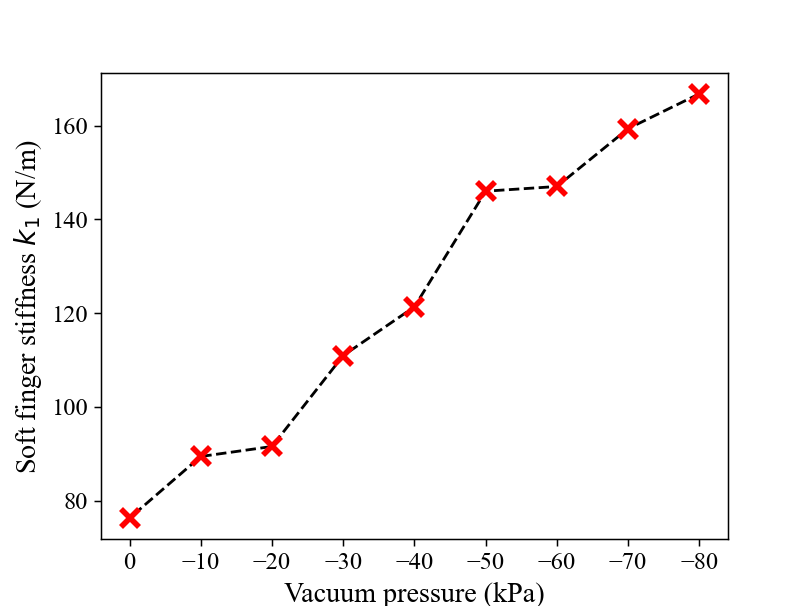

In [34]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
fig = plt.figure(3,figsize=(6, 4.5))
plt.plot( [element * (-1) for element in pressure_list], stiffness_list,marker = 'x', ms = 10, mec='red',mfc = 'red',mew=3,linestyle = 'dashed',color='k')
plt.xlabel('Vacuum pressure (kPa)',fontsize=15)
plt.ylabel('Soft finger stiffness $k_1$ (N/m)',fontsize=15)
plt.xticks([element * (-1) for element in pressure_list][::])
plt.gca().invert_xaxis()
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [32]:
fig.savefig('soft finger stiffness.jpg',bbox_inches = 'tight')

<IPython.core.display.Javascript object>


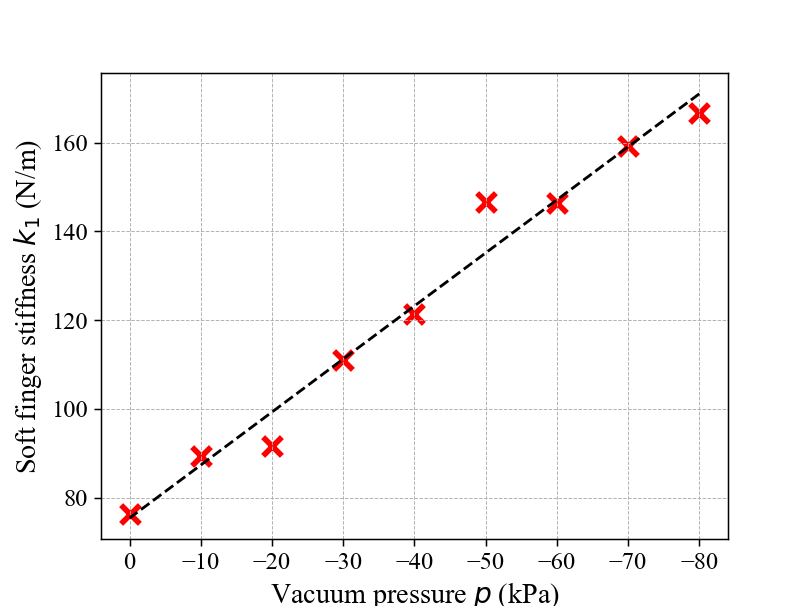

y=-1.194900x+(75.412889)


In [26]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
fig = plt.figure(4,figsize=(6, 4.5))
x = [element * (-1) for element in pressure_list]
y = stiffness_list
# plt.plot(x,y,marker = 'x', ms = 10, mec='red',mfc = 'red',mew=3,linestyle = 'dashed',color='k')
plt.scatter(x,y,marker = 'x', c = 'red',s=100, linewidths=3)
plt.xlabel('Vacuum pressure $p$ (kPa)',fontsize=15)
plt.ylabel('Soft finger stiffness $k_1$ (N/m)',fontsize=15)
plt.xticks([element * (-1) for element in pressure_list][::])
plt.gca().invert_xaxis()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [44]:
import math

def get_c(x0,x1,n,s):
    sigma = math.log((x0-s)/(x1-s))/n
    return 1/math.sqrt(1+(2*math.pi/sigma)**2)

get_c(0.0091,0.008779,1,0)
# piano key

0.005715464252530552

In [54]:
# c0,c1 fingertip 
c_l = []
c_l.append(get_c(-0.009959,-0.010555,6,-0.010648)) # 10
c_l.append(get_c(-0.010943,-0.011108,8,-0.011183)) # 20
c_l.append(get_c(-0.009832,-0.010827,4,-0.010891)) # 30
c_l.append(get_c(-0.010256,-0.01123,3,-0.011301)) # 40
c_l.append(get_c(-0.009807,-0.010526,4,-0.010654)) # 50
c_l.append(get_c(-0.010025,-0.011048,2,-0.011183)) # 60
c_l.append(get_c(-0.009818,-0.010176,5,-0.010252)) # 70
# c_l.append(get_c(-0.016577,-0.016645,3,-0.016699)) # 80 # bottom
c_l.append(get_c(-0.010191,-0.011069,2,-0.011179)) # 80 
c_l

[0.053046928732994256,
 0.02313395721655119,
 0.11096548891719729,
 0.141230843614222,
 0.07497597000406576,
 0.16857822764078306,
 0.055374394132677106,
 0.17208273325424428]

In [68]:
c_lb = []
c_lb.append(get_c(-0.016183,-0.016247,3,-0.01632)) # 00 # bottom
c_lb.append(get_c(-0.015316,-0.015459,3,-0.015503)) # 10 # bottom
c_lb.append(get_c(-0.015919,-0.015997,3,-0.016044)) # 20 # bottom
c_lb.append(get_c(-0.016019,-0.016109,3,-0.016145)) # 30 # bottom
c_lb.append(get_c(-0.016358,-0.016513,3,-0.016556)) # 40 # bottom
c_lb.append(get_c(-0.016022,-0.01612,3,-0.016159)) # 50 # bottom
c_lb.append(get_c(-0.016445,-0.016565,3,-0.016603)) # 60 # bottom
c_lb.append(get_c(-0.015753,-0.015925,5,-0.015979)) # 70 # bottom
c_lb.append(get_c(-0.016577,-0.016645,3,-0.016699)) # 80 # bottom
c_lb

[0.03337854250226386,
 0.07653627926517366,
 0.05182359380492559,
 0.06631484194383337,
 0.08074886494046506,
 0.06650753342938888,
 0.0753839577047602,
 0.04552044695077283,
 0.043198692062870706]

In [92]:
get_c(0.005171,0.005109,3,0.00507) # piano key bottom

0.05041756456907798

<IPython.core.display.Javascript object>


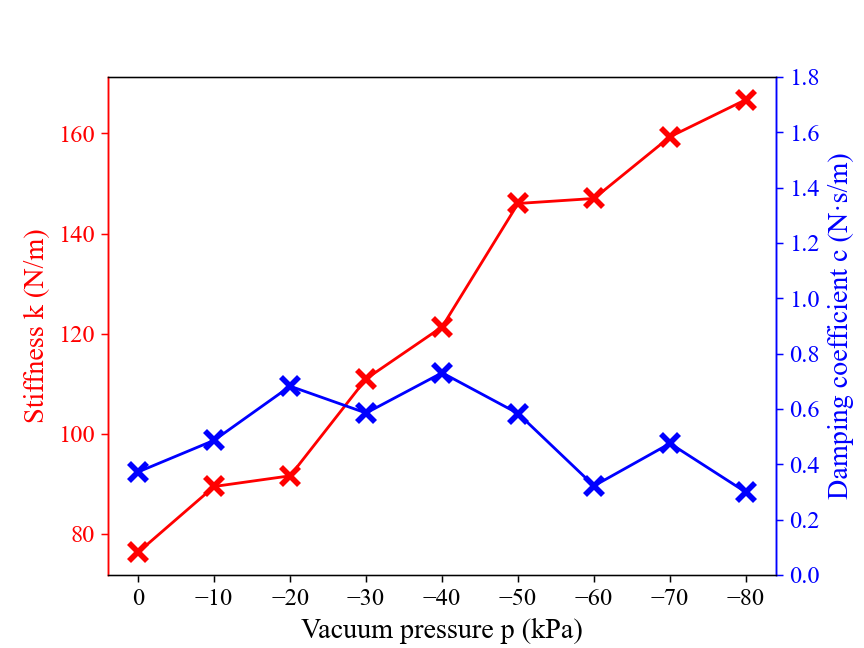

y=-1.195533x+(75.372000)


In [108]:
c_lb = [0.298589486,0.475234077,0.321786452,0.583335817,0.730598518,0.58503082,0.682057981,0.486584828,0.372240531]

import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})
# fig = plt.figure(8,figsize=(6, 4.5))
fig, ax1 = plt.subplots()
x = [element * (-1) for element in pressure_list]
y = stiffness_list
# plt.plot(x,y,marker = 'x', ms = 10, mec='red',mfc = 'red',mew=3,linestyle = 'dashed',color='k')
ax1.plot(x,y,marker = 'x', ms = 10, mec='red',mfc = 'red',mew=3,linestyle = '-',color='r')
ax1.set_xlabel('Vacuum pressure p (kPa)',fontsize=15)
ax1.set_ylabel('Stiffness k (N/m)',fontsize=15,color='r')
ax1.set_xticks([element * (-1) for element in pressure_list][::])
ax2 = ax1.twinx() 
ax2.plot(x,c_lb,marker = 'x', ms = 10, mec='blue',mfc = 'blue',mew=3,linestyle = '-',color='b')
ax2.set_ylabel('Damping coefficient c (N·s/m)',fontsize=15,color='b') 
ax2.set_ylim([0,1.8])
ax1.spines['bottom'].set_color('#dddddd')
ax1.spines['top'].set_color('#dddddd') 
ax1.spines['right'].set_color('blue')
ax1.spines['left'].set_color('red')
ax2.spines['right'].set_color('blue')
ax2.spines['left'].set_color('red')
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')
# ax1.spines['top'].set_visible(False)
# ax2.spines['top'].set_visible(False)
plt.gca().invert_xaxis()
# plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()
# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# the line equation:
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

In [84]:
fig.savefig('sysid.jpg',bbox_inches = 'tight')

In [109]:
fig.savefig('sysid.eps',bbox_inches = 'tight', format='eps')

In [91]:
sum(c_lb) / len(c_lb)

0.059934750289383804